<a href="https://colab.research.google.com/github/afshari-maryam/HuggingFace-learning/blob/main/Transformers-pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.8 MB/s 
     |████████████████████████████████| 7.6 MB 44.6 MB/s 
     |████████████████████████████████| 182 kB 24.4 MB/s 


In [3]:
!pip install datasets evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 5.1 MB/s 
     |████████████████████████████████| 72 kB 1.4 MB/s 
     |████████████████████████████████| 212 kB 69.9 MB/s 
     |████████████████████████████████| 132 kB 69.1 MB/s 
     |████████████████████████████████| 127 kB 58.6 MB/s 
     |████████████████████████████████| 1.3 MB 55.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
import transformers

In [4]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

In [5]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

#Zero-shot classification

In [6]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445988297462463, 0.11197440326213837, 0.04342682659626007]}

In [7]:
classifier(
    "این یک کلاس آموزشی برای کتابخانه ریاضی است",
    candidate_labels=["تحصیلات", "سیاست", "کسب و کار"],
)

{'sequence': 'این یک کلاس آموزشی برای کتابخانه ریاضی است',
 'labels': ['سیاست', 'تحصیلات', 'کسب و کار'],
 'scores': [0.9116271138191223, 0.04780317842960358, 0.04056970775127411]}

In [8]:
classifier(
    "این یک کلاس آموزشی برای کتابخانه ریاضی است",
    candidate_labels=["تحصیلات", "کسب و کار"],
)

{'sequence': 'این یک کلاس آموزشی برای کتابخانه ریاضی است',
 'labels': ['تحصیلات', 'کسب و کار'],
 'scores': [0.5409258604049683, 0.45907413959503174]}

In [9]:
classifier(
    "این یک کلاس آموزشی است",
    candidate_labels=["ریاضی", "سیاست"],
)

{'sequence': 'این یک کلاس آموزشی است',
 'labels': ['سیاست', 'ریاضی'],
 'scores': [0.91634202003479, 0.08365800976753235]}

#Text generation

In [10]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'In this course, we will teach you how to generate and format HTML documents. Once you have finished the course you will be able to start working with HTML documents. By the end of this course your website will look something like this.'}]

In [13]:
generator = pipeline("text-generation",num_return_sequences=4,max_length=15)
generator("In this course, we will teach you how to")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to design and deploy an embedded'},
 {'generated_text': 'In this course, we will teach you how to use this new tool to'},
 {'generated_text': 'In this course, we will teach you how to create or manage complex virtual'},
 {'generated_text': 'In this course, we will teach you how to set up and deploy your'}]

In [14]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, I'm writing a new language for you. But first, I'd like to tell you about the language itself"},
 {'generated_text': "Hello, I'm a language model, and I'm trying to be as expressive as possible. In order to be expressive, it is necessary to know"},
 {'generated_text': "Hello, I'm a language model, so I don't get much of a license anymore, but I'm probably more familiar with other languages on that"},
 {'generated_text': "Hello, I'm a language model, a functional model... It's not me, it's me!\n\nI won't bore you with how"},
 {'generated_text': "Hello, I'm a language model, not an object model.\n\nIn a nutshell, I need to give language model a set of properties that"}]

In [15]:
generator("In this course, we will teach you how to", max_length=15, num_return_sequences=3)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to successfully interact with various levels'},
 {'generated_text': 'In this course, we will teach you how to build the best custom websites'},
 {'generated_text': 'In this course, we will teach you how to create high quality 3D'}]

#Using any model from the Hub in a pipeline

In [16]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/353M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to create simple and inexpensive forms of digital signatures on a spreadsheet. We have a website and a mobile app'},
 {'generated_text': 'In this course, we will teach you how to play, write, and read the rules and rules. However, one should never assume that we all'}]

#Fill masking

In [21]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/331M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'score': 0.19619810581207275,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.04052736610174179,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

In [22]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-multilingual-cased')
unmasker("Hello I'm a [MASK] model.")

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

[{'score': 0.10182077437639236,
  'token': 13192,
  'token_str': 'model',
  'sequence': "Hello I'm a model model."},
 {'score': 0.052126266062259674,
  'token': 11356,
  'token_str': 'world',
  'sequence': "Hello I'm a world model."},
 {'score': 0.04893037676811218,
  'token': 11165,
  'token_str': 'data',
  'sequence': "Hello I'm a data model."},
 {'score': 0.020360134541988373,
  'token': 23578,
  'token_str': 'flight',
  'sequence': "Hello I'm a flight model."},
 {'score': 0.020079664885997772,
  'token': 14155,
  'token_str': 'business',
  'sequence': "Hello I'm a business model."}]

#Named entity recognition

In [23]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")
# ORG = organization, PER = Person, LOC= location

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/pipelines/token_classification.py:159: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': 0.9981694,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9796019,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9932106,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

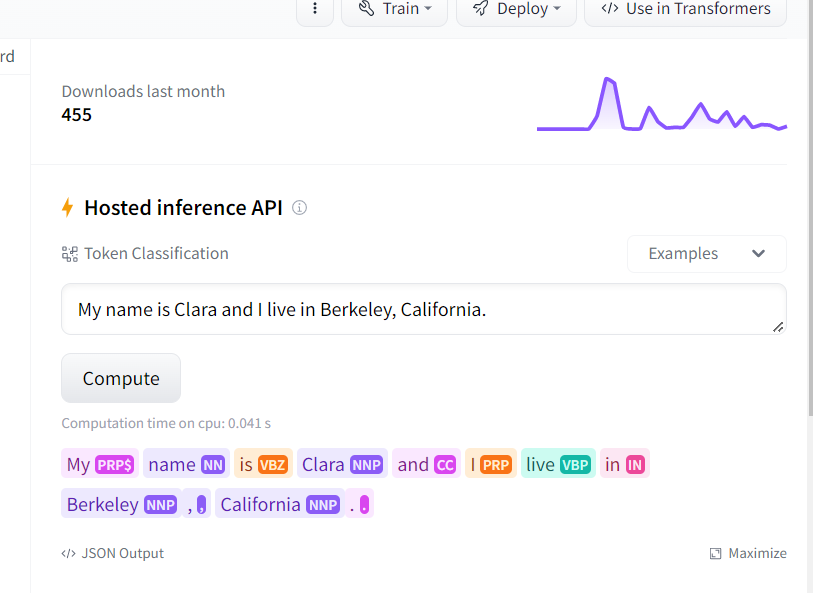

https://huggingface.co/QCRI/bert-base-multilingual-cased-pos-english?text=My+name+is+Clara+and+I+live+in+Berkeley%2C+California.

In [26]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, TokenClassificationPipeline

model_name = "QCRI/bert-base-multilingual-cased-pos-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

pipeline = TokenClassificationPipeline(model, tokenizer)
outputs = pipeline("A test example")
print(outputs)


AttributeError: ignored

#Part of Speech Tagging (POS)

#Automatic Speech Recognition:
The original model can be found under https://github.com/pytorch/fairseq/tree/master/examples/wav2vec#wav2vec-20.

In [17]:
 from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
 from datasets import load_dataset
 import torch
 
 # load model and processor
 processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")
 model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")
     
 # load dummy dataset and read soundfiles
 ds = load_dataset("patrickvonplaten/librispeech_asr_dummy", "clean", split="validation")
 
 # tokenize
 input_values = processor(ds[0]["audio"]["array"], return_tensors="pt", padding="longest").input_values
 
 # retrieve logits
 logits = model(input_values).logits
 
 # take argmax and decode
 predicted_ids = torch.argmax(logits, dim=-1)
 transcription = processor.batch_decode(predicted_ids)


Downloading:   0%|          | 0.00/158 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/162 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h-lv60-self and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset librispeech_asr_dummy downloaded and prepared to /root/.cache/huggingface/datasets/patrickvonplaten___librispeech_asr_dummy/clean/2.1.0/f2c70a4d03ab4410954901bde48c54b85ca1b7f9bf7d616e7e2a72b5ee6ddbfc. Subsequent calls will reuse this data.


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


In [19]:
!pip install jiwer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.7 MB/s 
     |████████████████████████████████| 2.2 MB 8.4 MB/s 


In [20]:
from datasets import load_dataset
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import torch
from jiwer import wer


librispeech_eval = load_dataset("librispeech_asr", "clean", split="test")

model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h-lv60-self").to("cuda")
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")

def map_to_pred(batch):
    inputs = processor(batch["audio"]["array"], return_tensors="pt", padding="longest")
    input_values = inputs.input_values.to("cuda")
    attention_mask = inputs.attention_mask.to("cuda")
    
    with torch.no_grad():
        logits = model(input_values, attention_mask=attention_mask).logits

    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)
    batch["transcription"] = transcription
    return batch

result = librispeech_eval.map(map_to_pred, remove_columns=["audio"])

print("WER:", wer(result["text"], result["transcription"]))


Extracting data files #0:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #1:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #3:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #2:   0%|          | 0/1 [00:00<?, ?obj/s]

Generating train.100 split:   0%|          | 0/28539 [00:00<?, ? examples/s]

Generating train.360 split:   0%|          | 0/104014 [00:00<?, ? examples/s]

DatasetGenerationError: ignored